In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('../data/redshift_results.csv')

[<matplotlib.text.Text at 0x113381b70>, <matplotlib.text.Text at 0x11336a908>]

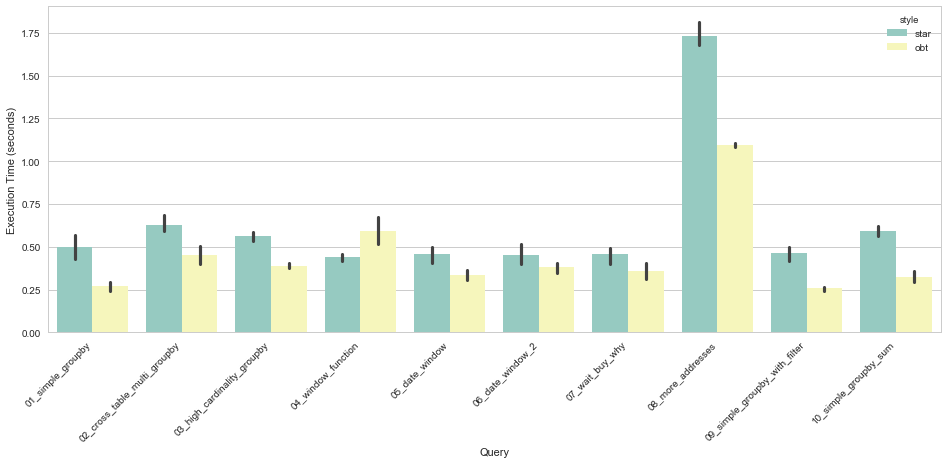

In [3]:
plt.figure(figsize=(16, 6))
g = sns.barplot(y="time", x="test", hue="style",data=data, palette="Set3")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set(xlabel='Query', ylabel='Execution Time (seconds)')

In [4]:
avg = data.groupby(["style","test"]).agg({'time': 'mean'}).reset_index()
avg = avg.pivot(index='test', columns='style',  values='time').reset_index()

In [5]:
avg

style,test,obt,star
0,01_simple_groupby,0.268080,0.499314
1,02_cross_table_multi_groupby,0.452033,0.629066
2,03_high_cardinality_groupby,0.388744,0.561132
3,04_window_function,0.590342,0.440875
4,05_date_window,0.334489,0.458440
5,06_date_window_2,0.381114,0.451643
6,07_wait_buy_why,0.360760,0.457284
7,08_more_addresses,1.093745,1.728139
8,09_simple_groupby_with_filter,0.256620,0.461590
9,10_simple_groupby_sum,0.324579,0.590194


In [6]:
avg['improvement'] = 1- avg['obt'] / avg['star']

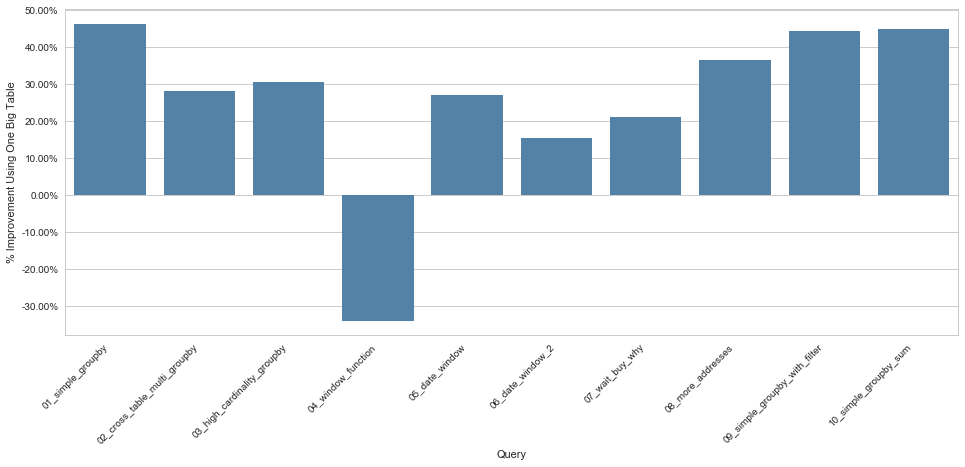

In [7]:
plt.figure(figsize=(16, 6))
g = sns.barplot(y="improvement", x="test", data=avg, color="steelblue")    
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set(xlabel='Query', ylabel='% Improvement Using One Big Table')
vals = g.get_yticks()
g.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [8]:
avg['improvement'].mean()

0.26115291864719115